# **Exploratory Data Analysis**

- In the aggTable, we had examined the various tables in the database to identify key variables,  Understand their relationships and determine which columns from different tables needs to be included in final analysis

- In EDA, We will analyze the aggTable to gain insights from the distribution of data across each column. This will help us to understand data patterns, identify anomalies and ensure data quality before proceding with further business research questions

In [4]:
import os
from sqlalchemy import create_engine
from dotenv import load_dotenv
# Load environment variables from .env file
load_dotenv()

True

In [5]:
from urllib.parse import quote_plus
import pandas as pd

# Import the credentials
username = os.getenv("USERNAME")
password = os.getenv("PASSWORD")
SERVER = os.getenv("SERVER")
DATABASE = os.getenv("DATABASE")
DRIVER = quote_plus(os.getenv("DRIVER"))

if username and password:
    connection_url = f"mssql+pyodbc://{username}:{password}@{SERVER}/{DATABASE}?driver={DRIVER}&Encrypt=no&TrustServerCertificate=yes"
else:
    connection_url = f"mssql+pyodbc://@{SERVER}/{DATABASE}?driver={DRIVER}&trusted_connection=yes"     

engine = create_engine(connection_url, fast_executemany=True)
query = "SELECT 1 as test_col"
print(pd.read_sql_query(query, con=engine))

   test_col
0         1


In [6]:
# Import the Aggregated Table from the database 
# and then we check the informaation like records, data types ...etc
query = "SELECT * FROM AggregatedTable"
vendorDf = pd.read_sql_query(query, con = engine)
vendorDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10649 entries, 0 to 10648
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorNumber           10649 non-null  int64  
 1   VendorName             10649 non-null  object 
 2   Brand                  10649 non-null  int64  
 3   Description            10649 non-null  object 
 4   ActualPrice            10649 non-null  float64
 5   PurchasePrice          10649 non-null  float64
 6   Volume                 10649 non-null  float64
 7   TotalPurchaseQuantity  10649 non-null  int64  
 8   TotalPurchaseDollars   10649 non-null  float64
 9   TotalSalesQuantity     10649 non-null  float64
 10  TotalExciseTax         10649 non-null  float64
 11  TotalSalesPrice        10649 non-null  float64
 12  AdditionalCharges      10649 non-null  float64
 13  TotalSalesDollars      10649 non-null  float64
 14  GrossProfit            10649 non-null  float64
 15  Pr

In [7]:
# Summary Statistics
vendorDf.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10649.0,10639.946474,18699.690185,2.000000,3924.000000,7153.000000,9552.000000,1.733570e+05
Brand,10649.0,18053.011175,12643.540588,58.000000,5815.000000,18775.000000,25521.000000,9.063100e+04
ActualPrice,10649.0,35.667835,148.527493,0.000000,10.990000,15.990000,28.990000,7.499990e+03
PurchasePrice,10649.0,24.399804,109.478470,0.000000,6.840000,10.450000,19.470000,5.681810e+03
Volume,10649.0,847.874683,665.323584,50.000000,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10649.0,3145.053808,11112.850987,1.000000,36.000000,261.000000,1982.000000,3.376600e+05
TotalPurchaseDollars,10649.0,30135.332924,123271.711797,0.000000,452.790000,3645.260000,20755.350000,3.811252e+06
TotalSalesQuantity,10649.0,3081.775284,10970.565956,0.000000,33.000000,261.000000,1934.000000,3.349390e+05
TotalExciseTax,10649.0,1775.295183,10991.923397,0.000000,4.800000,46.360000,418.480000,3.682428e+05
TotalSalesPrice,10649.0,18817.564870,45018.107334,0.000000,288.830000,2846.410000,16094.940000,6.728193e+05


### **Summary Statistics Insights:**

#### **Negative & Zero Values:**

- **Gross Profit:** Minimum value is -52,002.78, indicating losses. Some products or transactions may be selling at a loss due to high costs or selling at discounts lower than the purchase price.

- **Profit Margin:** Has a minimum of -∞, which suggests cases where revenue is zero or even lower than costs.

- **Total Sales Quantity & Sales Dollars:** Minimum values are 0, meaning some products were purchased but never sold. These could be slow-moving or obsolete stock.

#### **Outliers Indicated by High Standard Deviations:**

- **Purchase & Actual Prices:** The max values (5,681.81 & 7,499.99) are significantly higher than the mean (24.39 & 35.64), indicating potential premium products.

- **Freight Cost:** Huge variation, from 0.09 to 257,032.07, suggests logistics inefficiencies or bulk shipments.

- **Stock Turnover:** Ranges from 0 to 274.5, implying some products sell extremely fast while others remain in stock indefinitely. Value more than 1 indicates that sold quantity for that product is higher than purchased quantity due to either sales are being fulfilled from older stock.

#### Visuals for seeing the Distribution of data

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import scipy.stats as stats
import plotly.express as px
import numpy as np

import warnings

warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)


#### Distribution of data in the columns we divide the data frame into numerical and Categorical columns and then do the distribution check

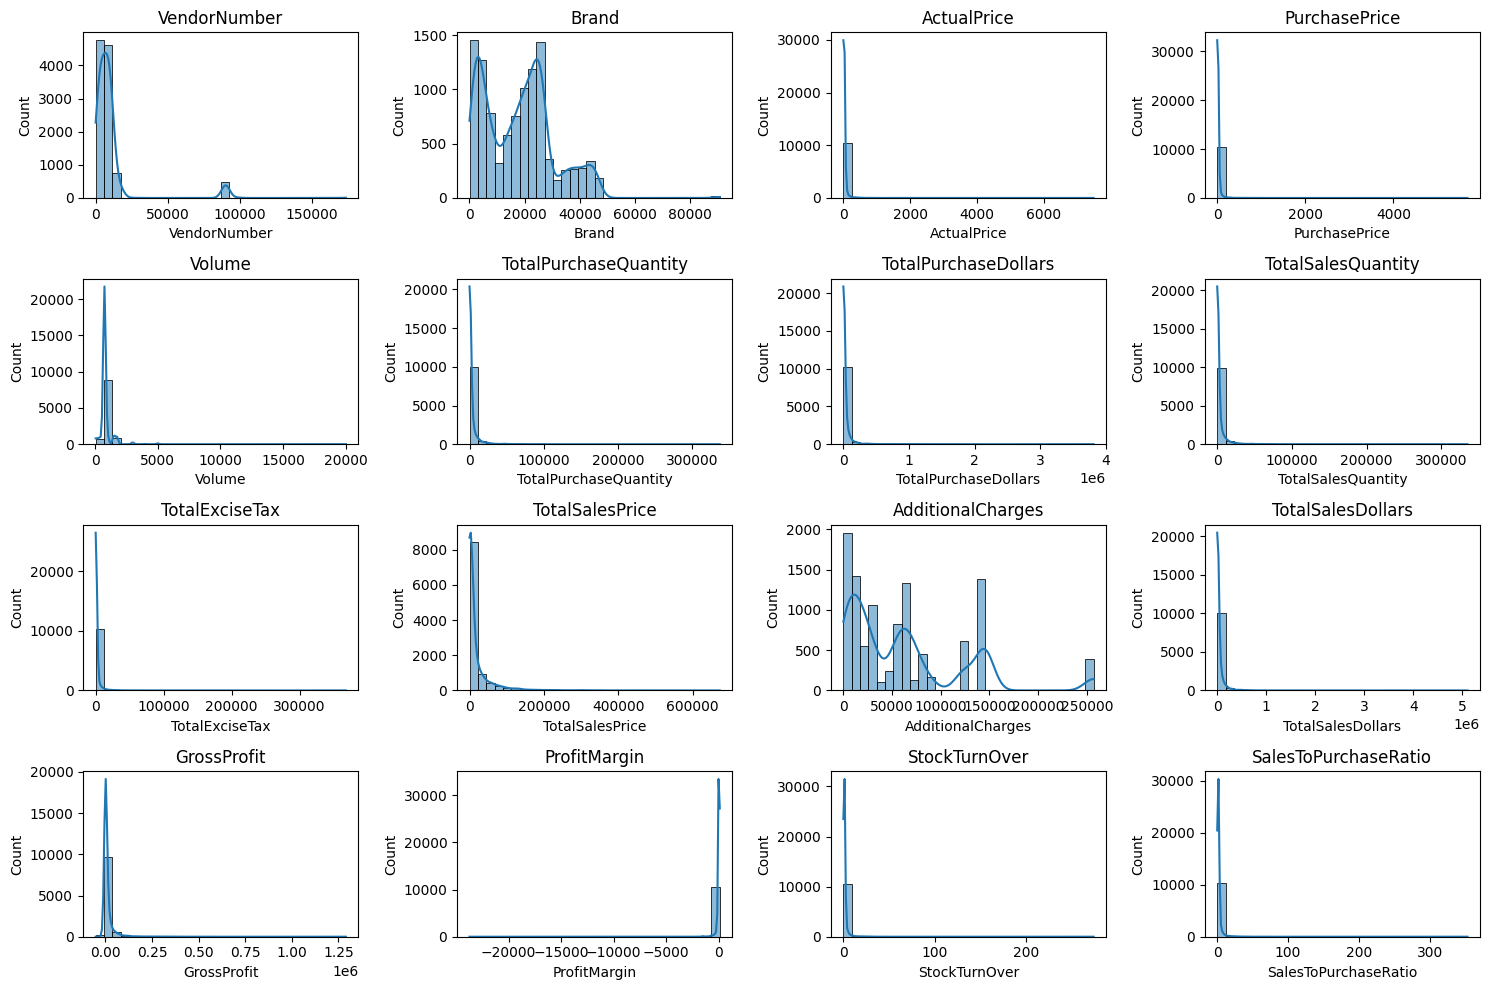

In [9]:
"""
    Subplot = It is used to show different visual in a single place with grid like view
              subplot(rows, columns, position) i.e rows and columns are divided based on 
              no.of columns in the data frame. While position is used to place the current visual

    KDE = The smooth curve on the top of histogram that show the distribution curve 
          instead of depending on the bar size.

    tight_layout = Ensure that equal spacing b/w visuals for better representation
"""


# Get the Numercial Columns
num_cols = vendorDf.select_dtypes(include=np.number).columns


plt.figure(figsize=(15,10))
# Plot the distribution
for i,col in enumerate(num_cols):
    plt.subplot(4, 4, i + 1)
    sns.histplot(vendorDf[col], kde = True, bins = 30)
    plt.title(col)

plt.tight_layout()
plt.show()

##### We can see from visual lot of outliers are present in the data
##### To see more clearly we use the boxplot

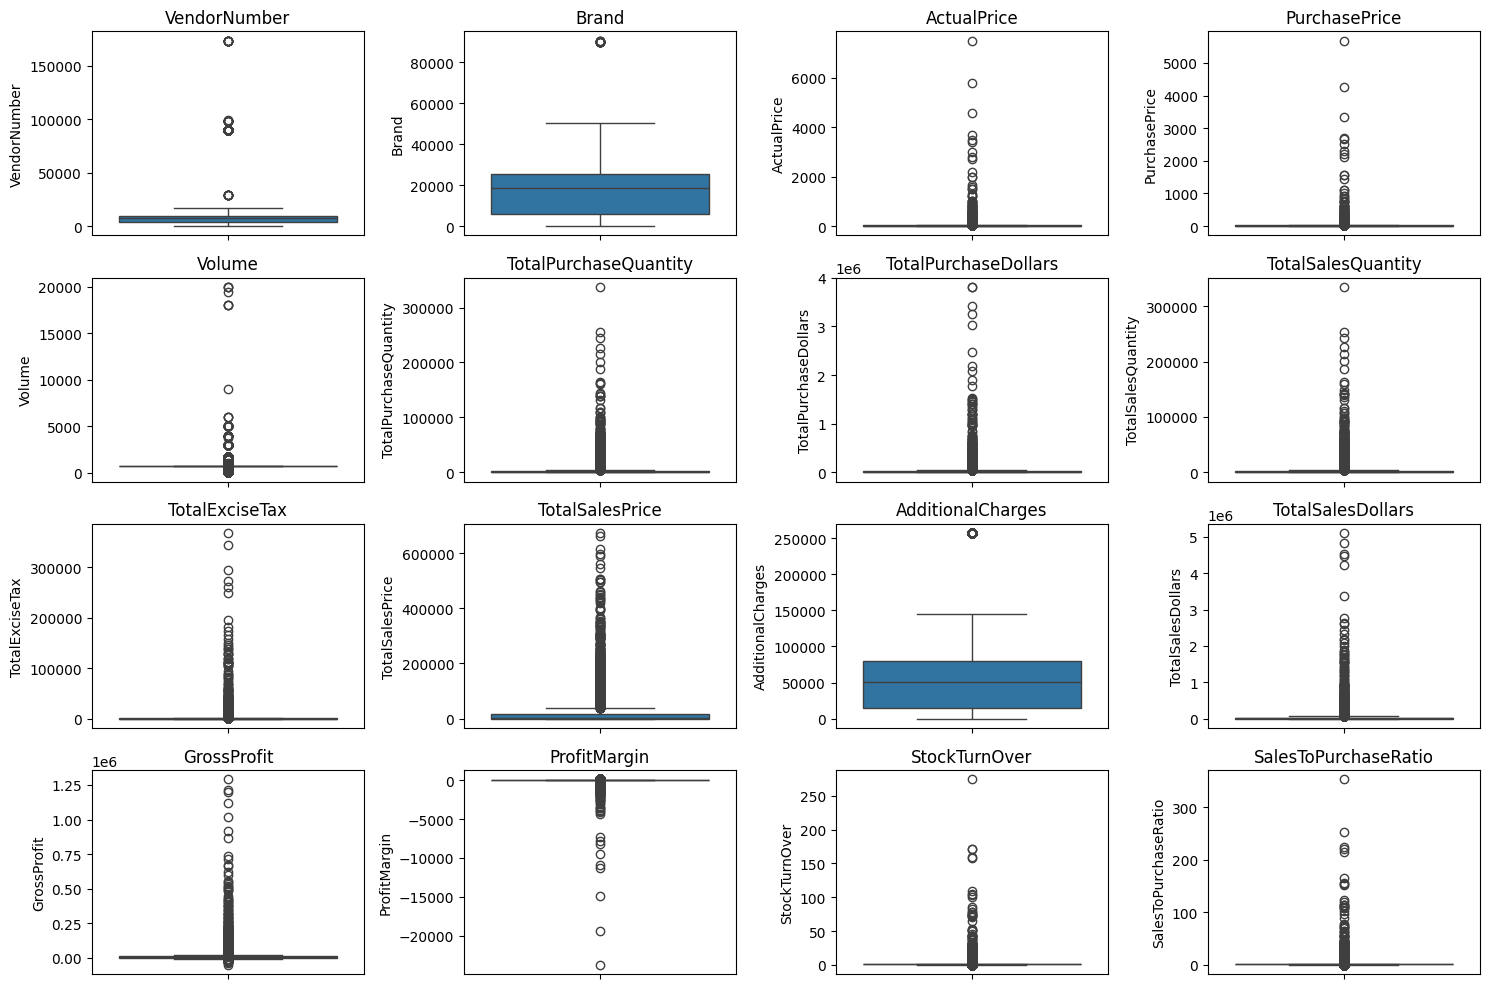

In [10]:
plt.figure(figsize=(15,10))

# Plot the distribution
for i,col in enumerate(num_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot( y=vendorDf[col])
    plt.title(col)

plt.tight_layout()
plt.show()

##### Remove the outliers and again check the distribution of data

| Column               | Reason to filter                                                                                           |
| -------------------- | ---------------------------------------------------------------------------------------------------------- |
| `GrossProfit`        | Negative gross profit may indicate loss or bad data. Outliers could skew analysis.                         |
| `ProfitMargin`       | Negative or zero margin may indicate a vendor is unprofitable. It is often critical in financial analysis. |
| `TotalSalesQuantity` | Zero or negative sales may be invalid or irrelevant for performance metrics.                               |


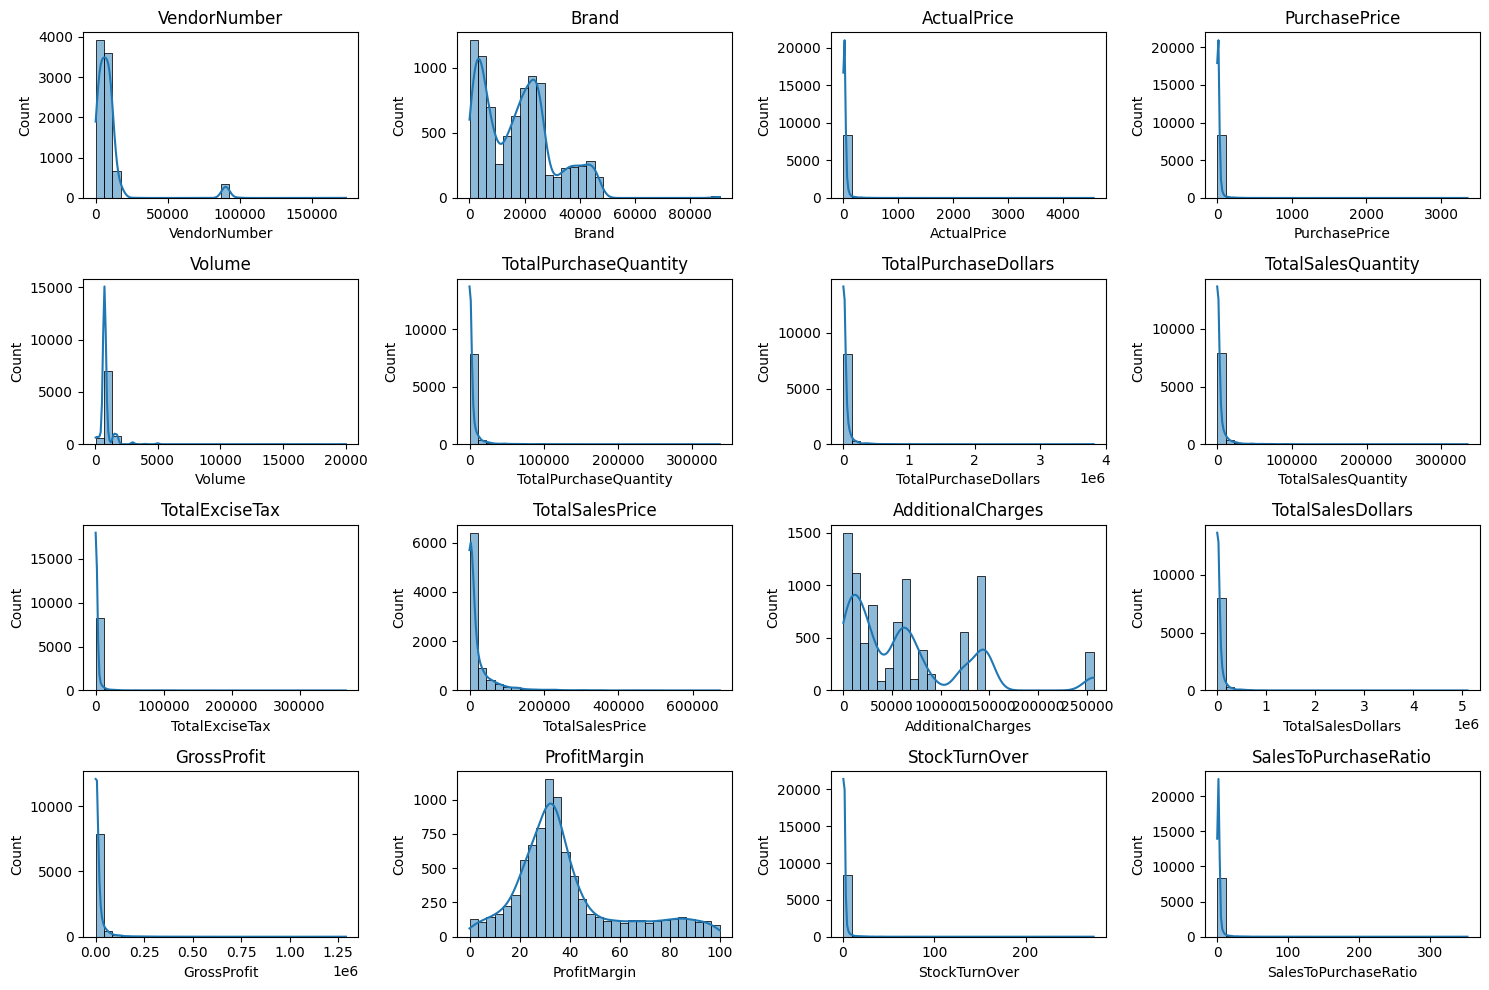

In [11]:
df = vendorDf[
    (vendorDf["GrossProfit"] > 0) &
    (vendorDf["ProfitMargin"] > 0) &
    (vendorDf["TotalSalesQuantity"] > 0)
]

# Get the Numercial Columns
num_cols = df.select_dtypes(include=np.number).columns

# Plot the Distribution
plt.figure(figsize=(15,10))
for i,col in enumerate(num_cols):
    plt.subplot(4, 4, i + 1)
    sns.histplot(df[col], kde = True, bins = 30)
    plt.title(col)

plt.tight_layout()
plt.show()

#### Distribution for the categoricl columns we use the countplot instead of histogram

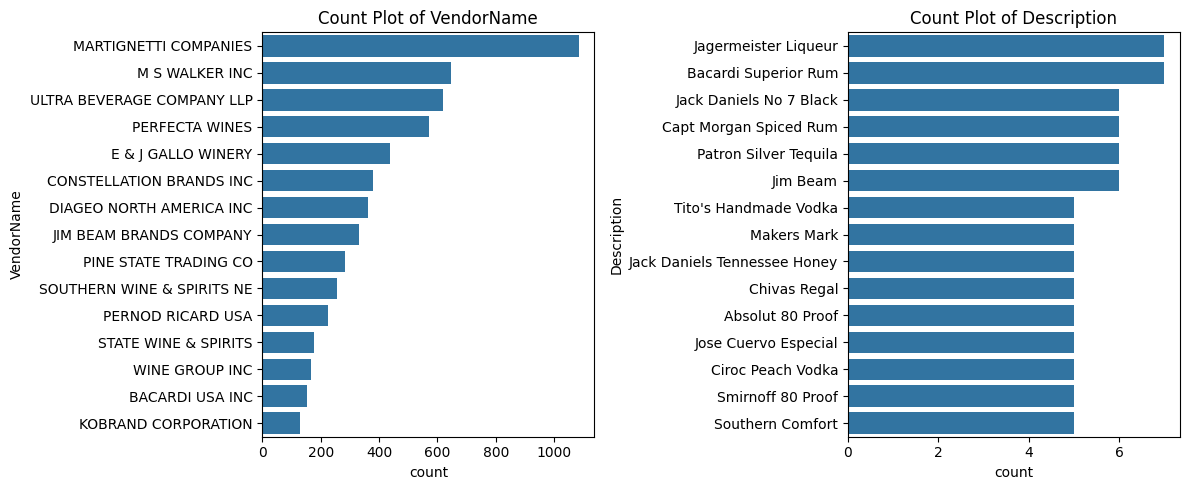

In [12]:
# Get the Categorical Columns 
cat_cols = ["VendorName","Description"]
plt.figure(figsize=(12,5))

# Plot the Distribution
for i,col in enumerate(cat_cols):
    plt.subplot(1, 2, i + 1)
    sns.countplot(y = df[col], order = df[col].value_counts().index[:15])
    plt.title(f"Count Plot of {col}")

plt.tight_layout()
plt.show()

##### Correlation Matrix : The matrix representation that is used to show the correlation between the columns in the table. The correlation is the way how the change in value of one column affects other columns.

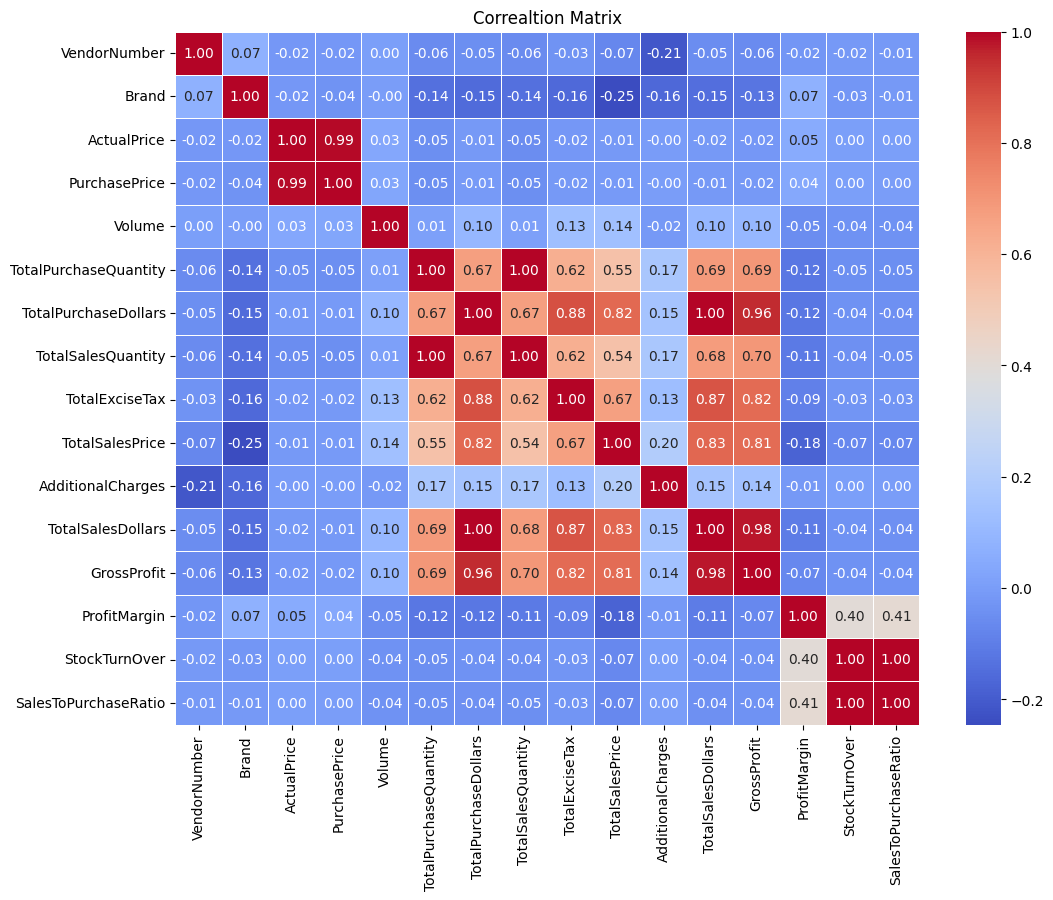

In [13]:
"""
    We can only get correlation for numerical columns.
    annot = True : Used to show the correlation value.
    fmt = ".2f" : Used to define the way the value is shown.
    cmap = "coolwarm" : Color of the Heatmap
"""

plt.figure(figsize = (12,9))
mat = df[num_cols].corr()
sns.heatmap(mat, annot=True,fmt=".2f",linewidths=0.5,cmap="coolwarm")
plt.title("Correaltion Matrix")
plt.show()

### Insights:
1. **PurchasePrice** has weak correlations with **TotalSalesDollars (-0.012) and GrossProfit (-0.016)**, suggesting that price variations do not significantly impact sales revenue or profit.
2. **Strong correlation** between **total purchase quantity and total sales quantity (0.999)**, confirming efficient inventory turnover.
3. **Negative correlation** between **profit margin & total sales price (-0.179)** suggests that as sales price increases, margins decrease, possibly due to competitive pricing pressures.
4. StockTurnover has weak negative correlations with both **GrossProfit (-0.038) and ProfitMargin (-0.055)**, indicating that faster turnover does not necessarily result in higher profitability.


### **Business Research Questions**

##### **Identify the brands with Low sales and high profit margin for Brand Promotions**

In [14]:
brand_performance = df.groupby("Brand").agg({
    "TotalSalesDollars": "sum",
    "ProfitMargin": "mean"
}).reset_index()

# Set thresholds
low_sales = brand_performance["TotalSalesDollars"].quantile(0.15)
high_margin = brand_performance["ProfitMargin"].quantile(0.85)

# Add PromotionFlag column For better look of Brands that require promotion 
brand_performance["PromotionFlag"] = brand_performance.apply(
    lambda row: "Needs Promotion"
    if (row["TotalSalesDollars"] <= low_sales) and (row["ProfitMargin"] >= high_margin)
    else "Normal",
    axis=1
)

print("Brands With Low sales but High Profit Margins : \n")
print( brand_performance[brand_performance["PromotionFlag"] == "Needs Promotion"].sort_values("TotalSalesDollars"))


Brands With Low sales but High Profit Margins : 

      Brand  TotalSalesDollars  ProfitMargin    PromotionFlag
5493  22161               9.99     66.466466  Needs Promotion
4349  18073              11.58     65.975820  Needs Promotion
2869   8527              15.95     83.448276  Needs Promotion
966    2626              27.86     89.806174  Needs Promotion
2303   6064              27.96     82.153076  Needs Promotion
...     ...                ...           ...              ...
7632  36571             543.79     63.964030  Needs Promotion
117     369             545.58     64.373694  Needs Promotion
5735  23078             549.75     66.444748  Needs Promotion
4767  19591             558.87     69.434752  Needs Promotion
7401  33707             561.37     87.911716  Needs Promotion

[234 rows x 4 columns]


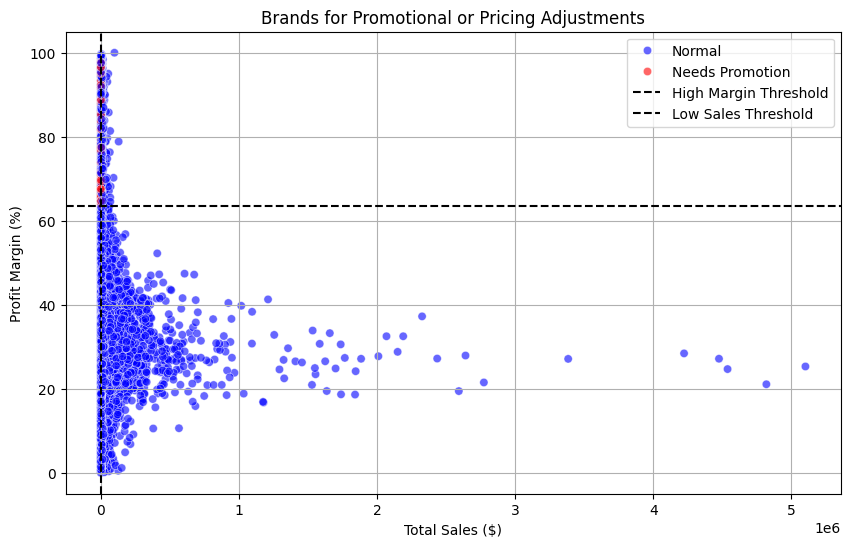

In [15]:
"""
    We use the scatterplot and then we create grid like view using the thresholds.
    The position on grid where the points are red in color then those brands require promotions.

"""

plt.figure(figsize=(10, 6))   

sns.scatterplot(
    data=brand_performance,
    x="TotalSalesDollars",
    y="ProfitMargin",
    hue="PromotionFlag",
    palette={"Needs Promotion": "red", "Normal": "blue"},
    alpha=0.6
)

# Add threshold lines for x and y axis
"""
    axvline and axhline automatically extends the points that is required to create the line
"""
plt.axhline(high_margin, linestyle="--", color="black", label="High Margin Threshold")
plt.axvline(low_sales, linestyle="--", color="black", label="Low Sales Threshold")

# Labels and title
plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")

# Legend and grid
plt.legend()
plt.grid(True)


plt.show()


#### Because of outliers we are not able to see the visuals clearly. To see more clearly filter the x - axis

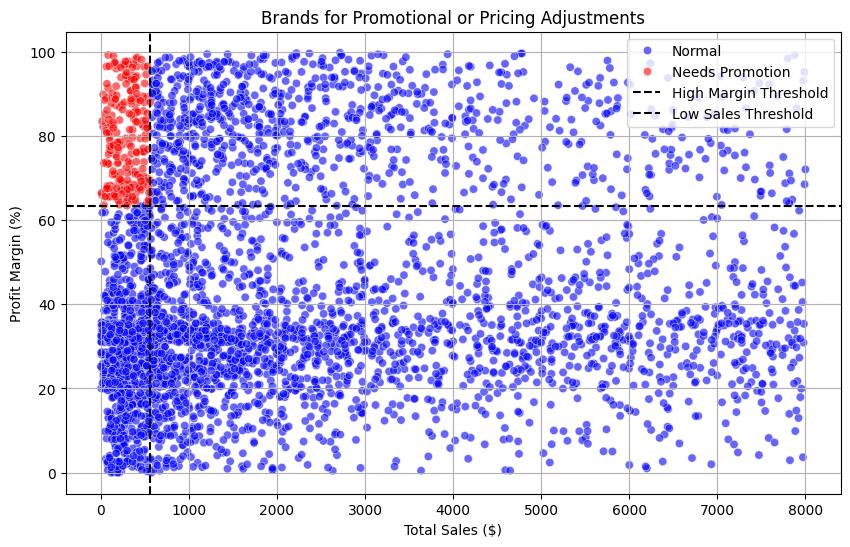

In [32]:
"""
    We use the scatterplot and then we create grid like view using the thresholds.
    The position on grid where the points are red in color then those brands require promotions.

"""

plt.figure(figsize=(10, 6))   

brand_performance = brand_performance[brand_performance["TotalSalesDollars"] < 8000] 
sns.scatterplot(
    data=brand_performance,
    x="TotalSalesDollars",
    y="ProfitMargin",
    hue="PromotionFlag",
    palette={"Needs Promotion": "red", "Normal": "blue"},
    alpha=0.6
)

# Add threshold lines for x and y axis
"""
    axvline and axhline automatically extends the points that is required to create the line
"""
plt.axhline(high_margin, linestyle="--", color="black", label="High Margin Threshold")
plt.axvline(low_sales, linestyle="--", color="black", label="Low Sales Threshold")

# Labels and title
plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")

# Legend and grid
plt.legend()
plt.grid(True)


plt.show()


#### **Identify the top vendors and brands by revenue**

In [16]:
# Create a function to format the numeric values into human readable form
def formatting(value):
    if value >= 1000000:
        return f"{value / 1000000 : .2f} M"
    elif value >= 1000:
        return f"{value / 1000 : .2f} K"
    return str(value)


In [39]:
# Top Vendors based on sales 
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_vendors.apply(lambda x: formatting(x))

VendorName
DIAGEO NORTH AMERICA INC       67.99 M
MARTIGNETTI COMPANIES          39.33 M
PERNOD RICARD USA              32.06 M
JIM BEAM BRANDS COMPANY        31.42 M
BACARDI USA INC                24.85 M
CONSTELLATION BRANDS INC       24.22 M
E & J GALLO WINERY             18.40 M
BROWN-FORMAN CORP              18.25 M
ULTRA BEVERAGE COMPANY LLP     16.46 M
M S WALKER INC                 14.68 M
Name: TotalSalesDollars, dtype: object

In [18]:
# Top Brands based on sales 
top_brands = df.groupby("Brand")["TotalSalesDollars"].sum().nlargest(10)
top_brands.apply(lambda x: formatting(x))

Brand
1233     5.10 M
3405     4.82 M
8068     4.54 M
4261     4.48 M
3545     4.22 M
3858     3.38 M
2589     2.77 M
3489     2.64 M
3102     2.59 M
1376     2.44 M
Name: TotalSalesDollars, dtype: object

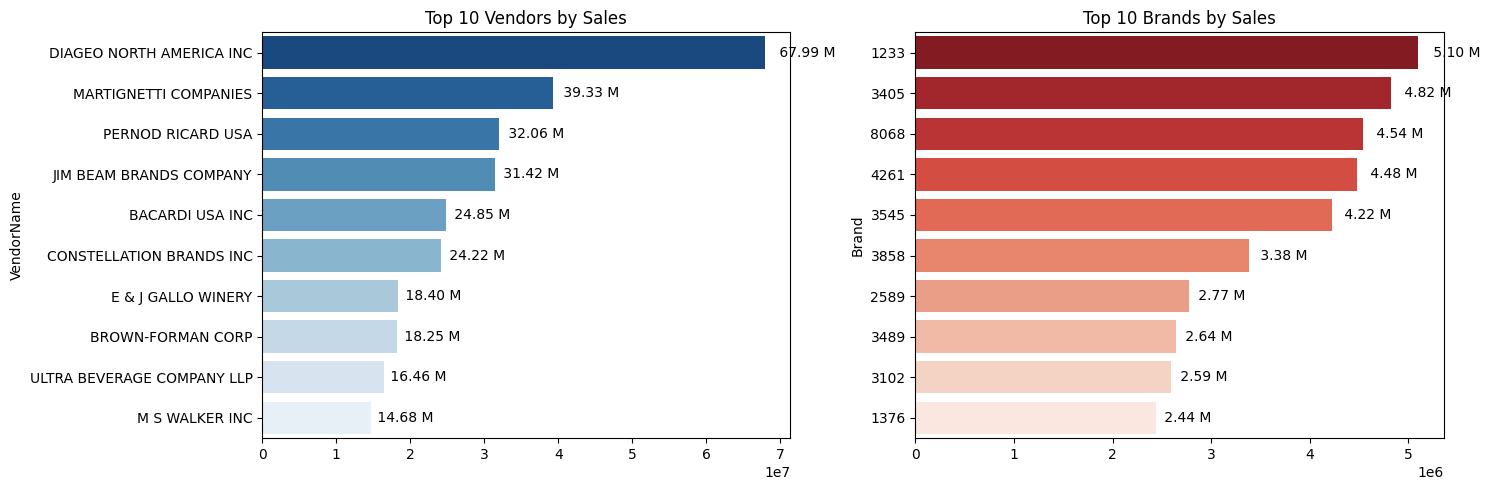

In [19]:
"""
    So for showing labels we need to use axis.text()
    Parameters:
        x = position along the x axis where we want the text 
        y = position along the y axis where we want the text 
        s = Text you want to display
        ha = Horizontal Alignment
        va = Vertical Alignment

    get_y : the y coordinate of bottom get edge of the bar
    get_width : the value of the bar along the x axis
    get height: the thickness of the bar
    
"""
plt.figure(figsize=(15, 5))   
# -----------------------
# chart: Top Vendors
# -----------------------
plt.subplot(1, 2, 1) 
ax1 = sns.barplot(
    y=top_vendors.index,
    x=top_vendors.values,
    palette="Blues_r"     
)
plt.title("Top 10 Vendors by Sales")

# Adding labels on bars

for bar in ax1.patches:
    ax1.text(
        bar.get_width() + (bar.get_width() * 0.02),  +
        bar.get_y() + bar.get_height() / 2,           
        formatting(bar.get_width()),          
        ha='left', va='center', fontsize=10, color='black'
    )

# -----------------------
# chart: Top Brands
# -----------------------
plt.subplot(1, 2, 2) 
ax2 = sns.barplot(
    y=top_brands.index.astype(str),
    x=top_brands.values,
    palette="Reds_r"
)
plt.title("Top 10 Brands by Sales")

# Adding labels on bars
for bar in ax2.patches:
    ax2.text(
        bar.get_width() + (bar.get_width() * 0.02),
        bar.get_y() + bar.get_height() / 2,
        formatting(bar.get_width()),
        ha='left', va='center', fontsize=10, color='black'
    )

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


#### **Identify the vendors who contribute the most to total purchase dollars**

In [20]:
vendors_purchase = df.groupby("VendorName").agg({
    "TotalPurchaseDollars" : "sum" ,
    "GrossProfit" : "sum",
    "TotalSalesDollars" :"sum"
}).reset_index()

vendors_purchase["PurchaseContribution"] = round((vendors_purchase["TotalPurchaseDollars"] /  vendors_purchase["TotalPurchaseDollars"].sum()) * 100 , 2)
vendors_purchase = vendors_purchase.sort_values("PurchaseContribution", ascending=False)

In [33]:
# Get the top 10 vendors
top_vendors_purchase = vendors_purchase.head(10)
top_vendors_purchase["TotalPurchaseDollars"] = top_vendors_purchase["TotalPurchaseDollars"].apply(lambda x: formatting(x))
top_vendors_purchase["GrossProfit"] = top_vendors_purchase["GrossProfit"].apply(lambda x: formatting(x))
top_vendors_purchase["TotalSalesDollars"] = top_vendors_purchase["TotalSalesDollars"].apply(lambda x: formatting(x))

# Adding the contribution to get the cummulative sum of top 10 vendors 
top_vendors_purchase["PurchaseCumlative"] = top_vendors_purchase["PurchaseContribution"].cumsum()
top_vendors_purchase

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution,PurchaseCumlative
25,DIAGEO NORTH AMERICA INC,50.10 M,17.89 M,67.99 M,16.34,16.34
56,MARTIGNETTI COMPANIES,25.50 M,13.83 M,39.33 M,8.32,24.66
67,PERNOD RICARD USA,23.85 M,8.21 M,32.06 M,7.78,32.44
45,JIM BEAM BRANDS COMPANY,23.49 M,7.93 M,31.42 M,7.66,40.10
6,BACARDI USA INC,17.43 M,7.42 M,24.85 M,5.69,45.79
20,CONSTELLATION BRANDS INC,15.27 M,8.95 M,24.22 M,4.98,50.77
11,BROWN-FORMAN CORP,13.24 M,5.01 M,18.25 M,4.32,55.09
30,E & J GALLO WINERY,12.07 M,6.33 M,18.40 M,3.94,59.03
105,ULTRA BEVERAGE COMPANY LLP,11.13 M,5.33 M,16.46 M,3.63,62.66
52,M S WALKER INC,9.75 M,4.93 M,14.68 M,3.18,65.84


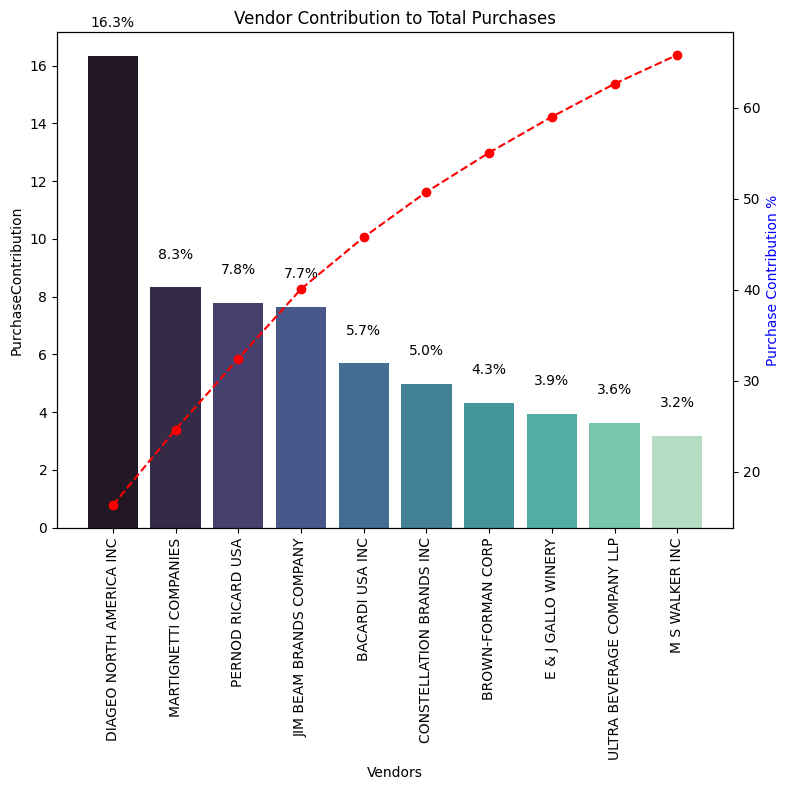

In [22]:
fig, ax1 = plt.subplots(figsize=(8, 8))

sns.barplot(
    x=top_vendors_purchase['VendorName'], 
    y=top_vendors_purchase['PurchaseContribution'], 
    palette="mako", 
    ax=ax1
)

# Annotate bars with contribution %
for i, value in enumerate(top_vendors_purchase['PurchaseContribution']):
    ax1.text(i, value + 1, f"{value:.1f}%", ha='center', fontsize=10, color='black')

# Creating the twin axis
ax2 = ax1.twinx()
ax2.plot(
        top_vendors_purchase["VendorName"] , 
        top_vendors_purchase["PurchaseCumlative"], 
        color="red", marker = "o", linestyle="dashed" ,
        label ="Cummalative Purchase Contribution"
    )
# Axis labels and formatting 
ax1.set_xticks(range(len(top_vendors_purchase['VendorName'])))
ax1.set_xticklabels(top_vendors_purchase['VendorName'], rotation=90)
ax2.set_ylabel('Purchase Contribution %', color='blue')
ax1.set_xlabel('Vendors')
ax1.set_title('Vendor Contribution to Total Purchases')

plt.tight_layout()
plt.show()


#### **How much of total procurement is dependent on top Vendors**

In [23]:
print(f"Total Purchase Contribution of Top 10 Vendors : {round(top_vendors_purchase["PurchaseContribution"].sum(),2)} %")

Total Purchase Contribution of Top 10 Vendors : 65.84 %


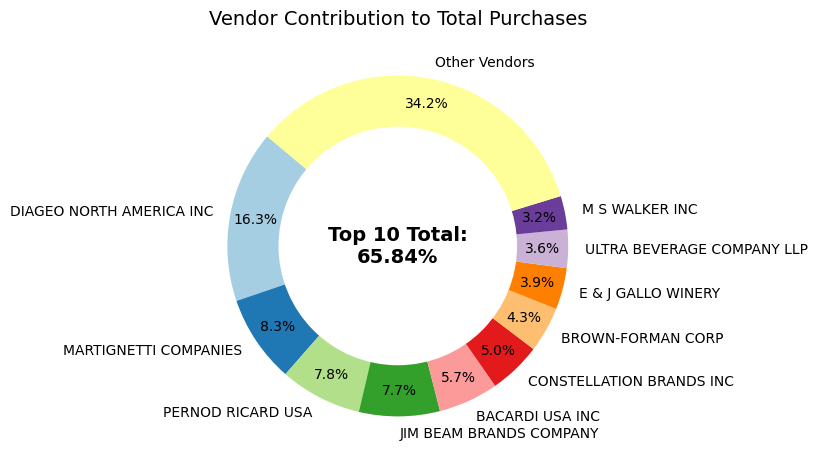

In [24]:
# Data preparation 
vendors = list(top_vendors_purchase['VendorName'].values)
purchase_contributions = list(top_vendors_purchase['PurchaseContribution'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Donut Chart 
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    purchase_contributions, 
    labels=vendors, 
    autopct='%1.1f%%',
    startangle=140, 
    pctdistance=0.85,
    colors=plt.cm.Paired.colors
)

# Draw a white circle in the center to create donut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add total contribution annotation in the center
total_contribution = sum(top_vendors_purchase['PurchaseContribution'])
plt.text(
    0, 0, f"Top 10 Total:\n{total_contribution:.2f}%", 
    fontsize=14, fontweight='bold', ha='center', va='center'
)

# Formatting
plt.title("Vendor Contribution to Total Purchases", fontsize=14)
plt.tight_layout()
plt.show()


#### **Does Purchasing in bulk reduce the unit price, and what is the optimal purchase volumn for cost savings**

In [ ]:
# Create a new column purchase price per unit quantity and create buckets accordingly 
df["UnitPurchasePrice"] = df["TotalPurchaseDollars"] / df["TotalPurchaseQuantity"]
df["OrderSize"] = pd.qcut(df["TotalPurchaseQuantity"] , q = 3, labels = ["Small","Medium","Large"])
df.groupby("OrderSize")[["UnitPurchasePrice"]].mean()



,UnitPurchasePrice
OrderSize,
Small,39.117966
Medium,15.489374
Large,10.772416


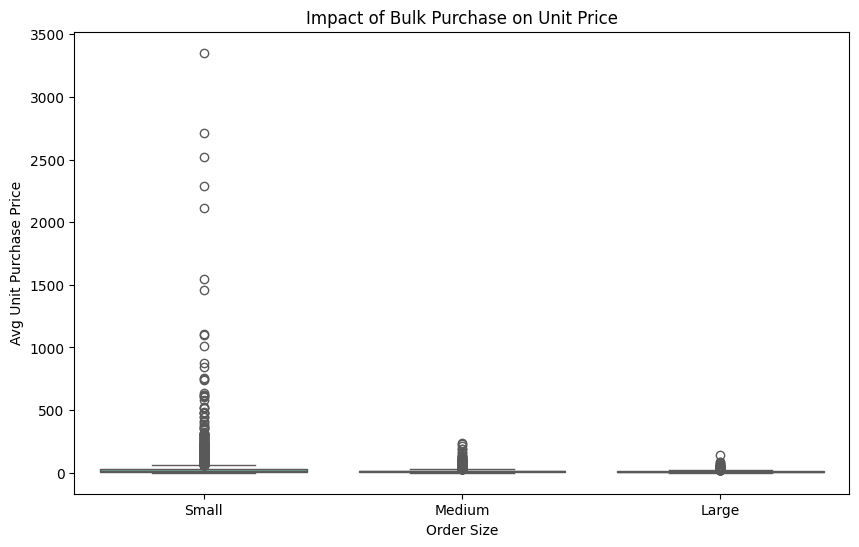

In [26]:
plt.figure(figsize = (10,6))
sns.boxplot(data = df, x = "OrderSize", y = "UnitPurchasePrice",palette = "Set2")
plt.title("Impact of Bulk Purchase on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Avg Unit Purchase Price")
plt.show()

- Bulk purchases lead to lower unit prices
- Businesses and buyers should prioritize larger order sizes to benefit from lower and more stable unit prices.
- Small orders, while sometimes necessary, come with higher costs and unpredictability.
- This insight is valuable for procurement strategies, budgeting, and inventory planning.

#### **Which Vendors have low Inventory Turnover ?**

In [27]:
df[df["StockTurnOver"] < 1].groupby("VendorName")[["StockTurnOver"]].mean().sort_values("StockTurnOver", ascending=True).head(10)

,StockTurnOver
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


#### **How much Captial is locked in unsold invenotry per Vendor and which vednors contribute the most of it**

In [28]:
# Create new column that shows the unsold quantity and we mutiply with its purchase price we get the total unsold value
df["UnsoldInventory"] = (df["TotalPurchaseQuantity"] - df["TotalSalesQuantity"]) * (df["PurchasePrice"])


inventory = df.groupby("VendorName")["UnsoldInventory"].sum().reset_index()
inventory = inventory.sort_values(by = "UnsoldInventory" , ascending = False)
inventory["UnsoldInventory"] = inventory["UnsoldInventory"].apply(formatting)

print("Total Unsold Captial : ", formatting(df["UnsoldInventory"].sum()))
print("Top 10 Vendors with unsold inventory:\n")
inventory.head(10)

Total Unsold Captial :   2.69 M
Top 10 Vendors with unsold inventory:



,VendorName,UnsoldInventory
25,DIAGEO NORTH AMERICA INC,722.21 K
45,JIM BEAM BRANDS COMPANY,554.67 K
67,PERNOD RICARD USA,470.63 K
115,WILLIAM GRANT & SONS INC,401.96 K
30,E & J GALLO WINERY,228.28 K
11,BROWN-FORMAN CORP,177.73 K
78,SAZERAC CO INC,173.03 K
20,CONSTELLATION BRANDS INC,133.62 K
60,MOET HENNESSY USA INC,126.48 K
76,REMY COINTREAU USA INC,118.60 K


## **Hypothesis Testing:**
### What is the 95 % Confidence Intervals for profit marigns of top performing and low performing vendors

In [29]:
# Create the upper and lower threshold for the range of values
top_thres = df["TotalSalesDollars"].quantile(0.75)
low_thres =  df["TotalSalesDollars"].quantile(0.25)

# Get the top and low performing vendors based on profit margin
top_vendor = df[df["TotalSalesDollars"] >= top_thres]["ProfitMargin"].dropna()
low_vendor = df[df["TotalSalesDollars"] <= low_thres]["ProfitMargin"].dropna()

In [34]:
# Create a user defined function that gives the upper, lower and mean value
def confidence_interval(data , confidence = 0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof = 1) / np.sqrt(len(data))
    t_crtical = stats.t.ppf((1 + confidence) / 2 , df = len(data) - 1)
    margin_of_error = t_crtical * std_err 
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error


top_mean, top_lower, top_upper = confidence_interval(top_vendor)
low_mean, low_lower, low_upper = confidence_interval(low_vendor)
print(f"Top Vendors 95 % C.I : ({top_lower: .2f} , {top_upper: .2f}), Mean :{top_mean: .2f}")
print(f"Top Vendors 95 % C.I : ({low_lower: .2f} , {low_upper: .2f}), Mean :{low_mean: .2f}")

Top Vendors 95 % C.I : ( 30.76 ,  31.64), Mean : 31.20
Top Vendors 95 % C.I : ( 40.45 ,  42.58), Mean : 41.51


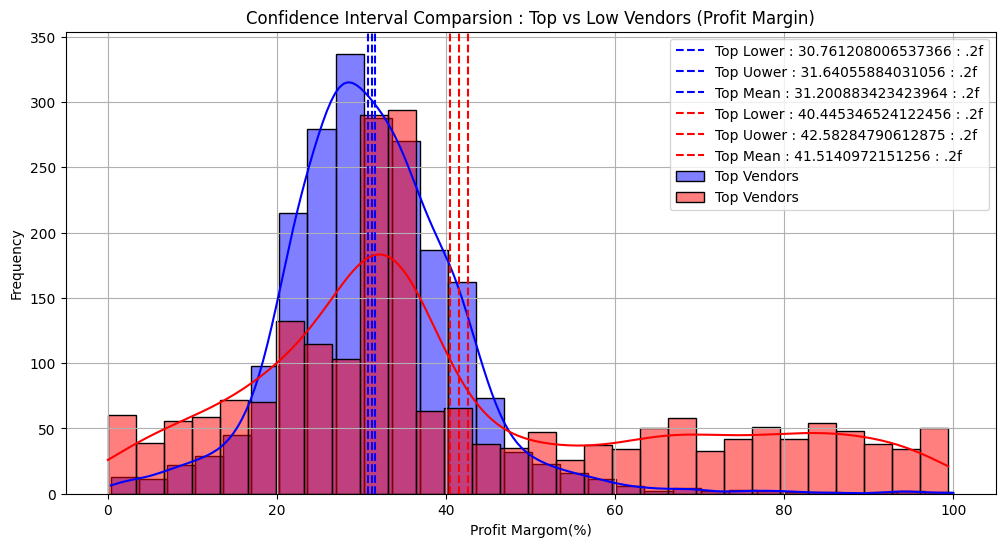

In [36]:
plt.figure(figsize = (12,6))

# Histogram for the Top Performing vendors
sns.histplot(top_vendor , kde = True , color = "blue" , bins = 30, alpha = 0.5 , label = "Top Vendors")
plt.axvline(top_lower , color ="blue", linestyle = "--" , label = f"Top Lower : {top_lower} : .2f")
plt.axvline(top_upper , color ="blue", linestyle = "--" , label = f"Top Uower : {top_upper} : .2f")
plt.axvline(top_mean , color ="blue", linestyle = "--" , label = f"Top Mean : {top_mean} : .2f")

# Histogram for the Low Performing vendors
sns.histplot(low_vendor , kde = True , color = "red" , bins = 30, alpha = 0.5 , label = "Top Vendors")
plt.axvline(low_lower , color ="red", linestyle = "--" , label = f"Top Lower : {low_lower} : .2f")
plt.axvline(low_upper , color ="red", linestyle = "--" , label = f"Top Uower : {low_upper} : .2f")
plt.axvline(low_mean , color ="red", linestyle = "--" , label = f"Top Mean : {low_mean} : .2f")

# Axis Formatting
plt.title("Confidence Interval Comparsion : Top vs Low Vendors (Profit Margin)")
plt.xlabel("Profit Margom(%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


- The confidence interval for **low-performing vendors (40.48% to 42.62%)** is significantly higher than that of **top-performing vendors (30.74% to 31.61%)**.

- This suggests that vendors with lower sales tend to maintain higher profit margins, potentially due to premium pricing or lower operational costs.

- **For High-Performing Vendors:** If they aim to improve profitability, they could explore selective price adjustments, cost optimization, or bundling strategies.

- **For Low-Performing Vendors:** Despite higher margins, their low sales volume might indicate a need for better marketing, competitive pricing, or improved distribution strategies.

### **Is there a Significant Difference in profit margins b/w top-performing and low-performing Vendors**


#### **Hypothesis**

##### **H₀(Null Hypothesis):-** There is no significant diff in the mean profit margins of top and low performing vendors.

##### **H₁(Alternative Hypothesis):-**  The mean profit margins of top and low performing vendors are significantly different.

In [37]:
# Create the upper and lower threshold for the range of values
top_thres = df["TotalSalesDollars"].quantile(0.75)
low_thres =  df["TotalSalesDollars"].quantile(0.25)

# Get the top and low performing vendors based on profit margin
top_vendors = df[df["TotalSalesDollars"] >= top_thres]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_thres]["ProfitMargin"].dropna()

# Use the inbuilt method for the ttest from scipy.stats
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var = False)

print(f"T-Statistic: {t_stat: .4f}, P-value : {p_value: .4f}")

if p_value < 0.05:
    print("Reject H₀ : The mean profit margins of top and low performing vendors are significantly different. ")
else:
    print("Fail to Reject H₀: There is no significant diff in tHe mean profit margins of top and low performing vendors. ")

T-Statistic: -17.5009, P-value :  0.0000
Reject H₀ : The mean profit margins of top and low performing vendors are significantly different. 
